In [1]:
import os
import sys
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print('Python Version')
print(sys.version)

print('Tensorflow version')
print(tf.__version__)
print('Is built with CUDA:',tf.test.is_built_with_cuda())
print('GPU:',tf.config.list_physical_devices('GPU'))

# Set random seeds
tf.random.set_seed(42)
np.random.seed(42)

from logicalEELS.models import createVAE, createDualVAE

2024-10-22 12:25:15.396327: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-22 12:25:16.084289: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64:/usr/local/cuda/lib64:
2024-10-22 12:25:16.085630: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64:/usr/local/cuda/lib64:
2024-10-22 12:25:16.085640: W 

Python Version
3.8.10 (default, Nov 22 2023, 10:22:35) 
[GCC 9.4.0]
Tensorflow version
2.11.0
Is built with CUDA: True
GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-10-22 12:25:17.042343: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-22 12:25:17.080943: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-22 12:25:17.081338: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
DATA_DIR = './data'
MODEL_DIR = './models'
BATCH_SIZE = 16
EPOCHS = 30

with np.load(os.path.join(DATA_DIR, 'MXene_EELS_Data.npz')) as data:
    data_X = data['x']
    data_Y = data['y']

inputShape = data_X.shape[1:]

dataset = tf.data.Dataset.from_tensor_slices({'x': data_X, 'y': data_Y})
dataset

2024-10-22 12:25:17.435836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-22 12:25:17.439274: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-22 12:25:17.439609: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-22 12:25:17.439871: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_nod

<TensorSliceDataset element_spec={'x': TensorSpec(shape=(240, 1), dtype=tf.float32, name=None), 'y': TensorSpec(shape=(240, 1), dtype=tf.float32, name=None)}>

In [3]:
def preprocess_fn(data):
    return (data['x'], data['y'])

dataset = dataset.map(preprocess_fn).batch(BATCH_SIZE)

In [11]:
print(dataset[0].shape)

TypeError: 'BatchDataset' object is not subscriptable

In [4]:
params={
    'INPUT_SHAPE'   :   (240, 1),
    'BATCH_SIZE'    :   BATCH_SIZE,
    'LATENT_SIZE'   :   16,
    'KERNEL_SIZES'  :   [7, 7, 3, 3],
    'FILTER_SIZES'  :   [16, 32, 32, 64],
    'ALPHA'         :   0.3,
    'DROPOUT'       :   0.2,
    'LR'            :   0.0005,
    'RECON_WEIGHT'  :   1.0,
    'KL_WEIGHT'     :   1.0,
    'CNVRG_WEIGHT'  :   1.0,
}

dvae = createDualVAE(params)
dvae.X_encoder.summary()
dvae.Y_encoder.summary()
dvae.decoder.summary()

Model: "standard_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 120, 16)           128       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 120, 16)           0         
                                                                 
 dropout (Dropout)           (None, 120, 16)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 60, 32)            3616      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 60, 32)            0         
                                                                 
 dropout_1 (Dropout)         (None, 60, 32)       

Epoch 1/30
855/855 [==============================] - 13s 16ms/step - loss: 335.1715 - reconstruction_loss: 323.3819 - convergence_loss: 0.1175 - kl_loss: 11.1914
Epoch 2/30
855/855 [==============================] - 21s 25ms/step - loss: 335.3855 - reconstruction_loss: 323.3988 - convergence_loss: 0.1136 - kl_loss: 11.1190
Epoch 3/30
855/855 [==============================] - 25s 29ms/step - loss: 334.8223 - reconstruction_loss: 323.3080 - convergence_loss: 0.1111 - kl_loss: 11.1500
Epoch 4/30
855/855 [==============================] - 24s 28ms/step - loss: 333.8113 - reconstruction_loss: 323.2833 - convergence_loss: 0.1136 - kl_loss: 11.1838
Epoch 5/30
855/855 [==============================] - 22s 25ms/step - loss: 334.0326 - reconstruction_loss: 323.2693 - convergence_loss: 0.1088 - kl_loss: 11.2284
Epoch 6/30
855/855 [==============================] - 25s 29ms/step - loss: 334.8690 - reconstruction_loss: 323.2093 - convergence_loss: 0.1076 - kl_loss: 11.2125
Epoch 7/30
855/855 [==

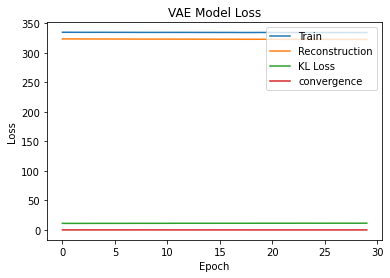

In [12]:
hist = dvae.fit(x=data_X, y=data_Y, batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True,)

plt.title('VAE Model Loss')
plt.plot(hist.history['loss'], label='Train')
plt.plot(hist.history['reconstruction_loss'], label='Reconstruction')
plt.plot(hist.history['kl_loss'], label='KL Loss')
plt.plot(hist.history['convergence_loss'], label='convergence')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [13]:
recon_X = dvae.denoise(data_X)
x_mean = dvae.X_encoder(data_X)
z_mean, _ = dvae.Y_encode(data_Y)
recon_Y = dvae.decode(z_mean)
print('Done')

428/428 [==============================] - 1s 3ms/step
Done


In [14]:
def plotSpectra(ax, energy, spectra, title=None):
    
    for i in range(24):
        ax.plot(energy, spectra[i*570+300:(i+1)*570+400].mean(axis=(0)))
        # ax.plot(energy, spectra[i].mean(axis=(0)))
    ax.set_xlabel('Energy Loss (eV)')
    ax.set_ylabel('Average Counts')
    if title!=None:
        ax.set_title(title)
    return ax

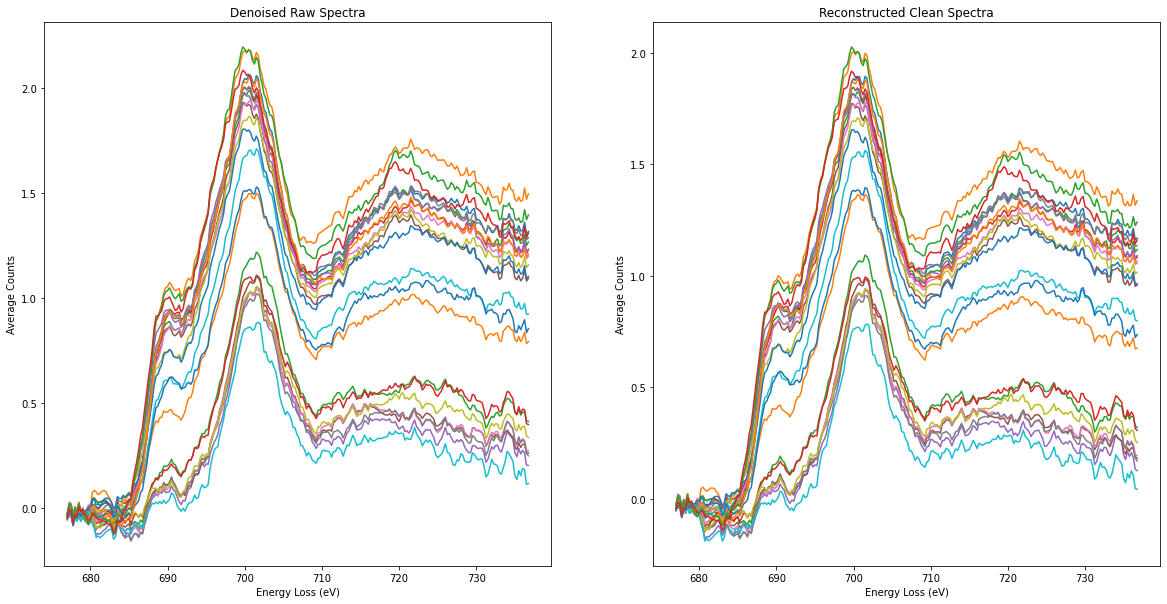

In [15]:
energy_axis = np.load(os.path.join(DATA_DIR, 'MXene_EELS_axis.npy'))
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plotSpectra(axes[0], energy_axis, recon_X, title='Denoised Raw Spectra')
plotSpectra(axes[1], energy_axis, recon_Y, title='Reconstructed Clean Spectra')
plt.show()

In [16]:
now = str(datetime.today()).split()[0]

dvae.compute_output_shape(input_shape=(None, 240, 1))
dvae.save(os.path.join(MODEL_DIR, 'dualvae_'+now))
dvae.save_weights(os.path.join(MODEL_DIR, 'dualvae_'+now+'.weights.h5'))
np.save(os.path.join(MODEL_DIR, 'dualvae_'+now+'_params.npy'), params)

INFO:tensorflow:Assets written to: ./models/dualvae_2024-10-22/assets


INFO:tensorflow:Assets written to: ./models/dualvae_2024-10-22/assets
